#**CNN - Image Classification**

---



---



#Step 1. Loading Libraries

In [1]:
import shutil
import os

#Step 2. connect to the drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Step 3. Copy your Dataset

In [4]:
"""
Unzipping The Data file
"""
#***To Change by the user****

#copy the path to the Data that you saved on drive or pc
!unzip "/content/drive/MyDrive/Mission AI channel/data/cats_vs_dogs_valid.zip"

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

In [5]:
"""
Making folder to copy the data for training, validation and testing purpose
by separating images in different folders i.e

Training images in training folder
Validation Images in validation folder
Testing Images in testing folder.
"""
!mkdir "mydata"

In [6]:
# here i am copying the images from unziped file to mydata folder.
def copy_images(src, dest, name, s_range, e_range):
  folders = os.listdir(dest)
  if name in folders:
    shutil.rmtree(os.path.join(dest,name))
  
  os.makedirs(os.path.join(dest,name))
  labels = os.listdir(os.path.join(src))
  for label in labels:
    os.mkdir(os.path.join(dest,name,label))
    i=0
    for image in os.listdir(os.path.join(src,label))[s_range:e_range]:
      if image.split(".")[-1].lower() == "jpg":
        shutil.copy(os.path.join(src, label, image), os.path.join(dest,name,label,image))
      i+=1
    print(f"{i} files copied for {label} class")
  print("Files moving done")

In [7]:
#*** to change by the user **
# add path to the training data, validation data, and testing data
src_train = "/content/training_set/training_set"
src_validation = "/content/training_set/training_set"
src_test = "/content/test_set/test_set"
dest = "/content/mydata"

In [8]:
copy_images(src_train,dest,"training",0,700)
copy_images(src_validation,dest,"validation",700,1100)
copy_images(src_test,dest,"testing",0,5000)

700 files copied for cats class
700 files copied for dogs class
Files moving done
400 files copied for cats class
400 files copied for dogs class
Files moving done
1012 files copied for cats class
1013 files copied for dogs class
Files moving done


# Step 4. Model Construction

In [9]:
from keras import layers
from keras import Sequential
import keras

In [10]:
model = Sequential()

In [11]:
model.add(layers.Conv2D(64, (3,3), activation="relu", input_shape=(320,320,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(122, activation = 'relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation = 'softmax'))

In [12]:
model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics = ['accuracy'])

#Step 5. Model Architecture

In [13]:
from keras.utils.vis_utils import plot_model

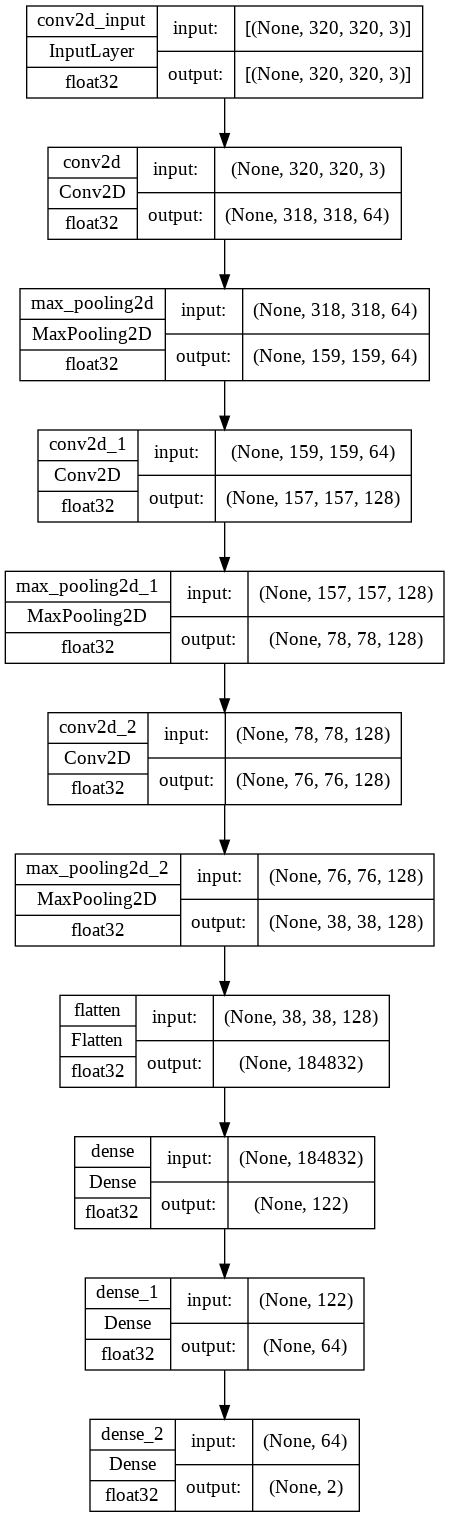

In [14]:
plot_model(model, show_layer_names = True, show_shapes=True, show_dtype=True)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 318, 318, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 159, 159, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 157, 157, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 78, 78, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 76, 76, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 38, 38, 128)      0

#Step 6. Load Images using ImageDatGenerator

In [16]:
from keras.preprocessing.image import ImageDataGenerator

In [17]:
training_data = ImageDataGenerator(rescale = 1./255)
validation_data = ImageDataGenerator(rescale = 1./255)
testing_data = ImageDataGenerator(rescale = 1./255)

In [20]:
seed = 2

training_data_image = training_data.flow_from_directory(
    "/content/mydata/training",
    target_size = (320,320),
    batch_size = 16,
    seed = seed
)
validation_data_image = validation_data.flow_from_directory(
    "/content/mydata/validation",
    target_size = (320,320),
    batch_size = 16,
    seed = seed
)
testing_data_image = testing_data.flow_from_directory(
    "/content/mydata/testing",
    target_size = (320,320),
    batch_size = 16,
    seed = seed
)

Found 1400 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [21]:
training_data_image.image_shape

(320, 320, 3)

#Step 7. Training Model

In [ ]:
history = model.fit_generator(
    training_data_image,
    steps_per_epoch = 100,
    validation_data = validation_data_image,
    validation_steps = 50,
    epochs =20
)

NameError: ignored


#Step 8. Save Model for future 

In [ ]:
#*** To chnage by the user ***

# To save the ML model in future cases
# set the path of drive or local pc where you want to save the model for future need
model.save("/content/drive/MyDrive/Mission AI channel/Models/Dogs_and_cats_classification_model.h5")

#Step 9. Loading Saved Model

In [22]:
from tensorflow import keras

In [23]:
#*** To change by the user ****

# set the path to load the model of drive or local pc where you save the model.
model = keras.models.load_model('/content/drive/MyDrive/Mission AI channel/Models/Dogs_and_cats_classification_model.h5')

#plots

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
training_los = history_dict['loss']
validation_loss= history_dict['val_loss']

In [ ]:
training_accuracy = history_dict['accuracy']
validation_acc = history_dict['val_accuracy']

In [ ]:
epochs = range(1,len(training_los)+1)

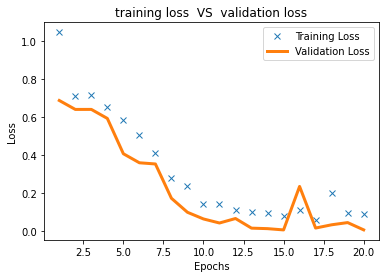

In [ ]:
plt.plot(epochs, training_los,'x', label='Training Loss')
plt.plot(epochs, validation_loss,'-',linewidth=3, label="Validation Loss")
plt.title("training loss  VS  validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

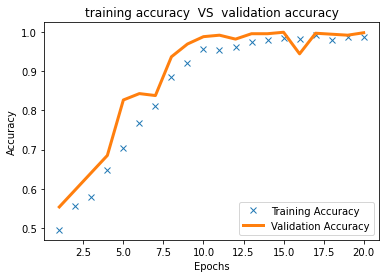

In [ ]:
plt.plot(epochs, training_accuracy,'x', label='Training Accuracy')
plt.plot(epochs, validation_acc,'-',linewidth=3, label="Validation Accuracy")
plt.title("training accuracy  VS  validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Prediction

In [24]:
import numpy as np

In [25]:
from PIL import Image

In [32]:
#*** To change by the user ***

#paste the path of the picture which you want to predict
file = Image.open("/content/drive/MyDrive/Mission AI channel/testing data/cat.jpg")

In [33]:
file = file.resize([320,320])

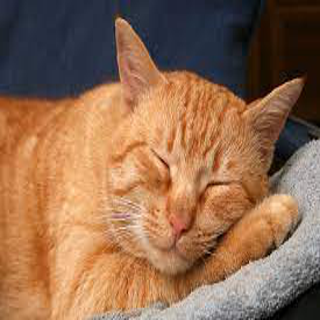

In [34]:
file

In [35]:
image_arr = np.asarray(file)

In [36]:
image_arr.shape

(320, 320, 3)

In [37]:
image_arr = image_arr.reshape((-1,320,320,3))
prediction = model.predict([image_arr])
print(f"\nThe Image above is \n\n\t CAT  ----------- {prediction[0][0]*100}%  \n\n\t DOG ----------- {prediction[0][1]*100}% ")

1/1 [==============================] - 0s 167ms/step
The Image above is 

	 CAT  ----------- 100.0%  

	 DOG ----------- 0.0% 


# class labels 

In [38]:
testing_data_image.class_indices

{'cats': 0, 'dogs': 1}